In [113]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
%config Completer.use_jedi = False
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mdd = pd.read_csv(mouse_drug_data_to_load)
df_ctd = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
df_clinical_data_all = pd.merge(df_ctd,df_mdd, on=['Mouse ID', 'Mouse ID'])



# Display the data table for preview
df_clinical_data_all.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0           45.000000                 0  Capomulin
1     b128          5           45.651331                 0  Capomulin
2     b128         10           43.270852                 0  Capomulin
3     b128         15           43.784893                 0  Capomulin
4     b128         20           42.731552                 0  Capomulin

## Tumor Response to Treatment

In [114]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame
df_cda = pd.DataFrame()
df_cda[['Drug','Timepoint', 'Tumor Volume (mm3)']] = df_clinical_data_all[['Drug','Timepoint', 'Tumor Volume (mm3)']]
df_mtv_by_drug_time = df_cda.groupby(['Drug','Timepoint']).mean()

# Preview DataFrame
df_mtv_by_drug_time.head()
#df_cda.head()
#pd_mtv_by_name_time[pd_mtv_by_name_time['Drug']]

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [115]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_t_vol_sem_by_drug_time = df_cda.groupby(['Drug','Timepoint']).sem()
df_t_vol_sem_by_drug_time.head()
# Convert to DataFrame

# Preview DataFrame



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [116]:
df_sem_by_drug_time_formatted = pd.DataFrame()
df_sem_by_drug_time_formatted = df_t_vol_sem_by_drug_time.pivot_table(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
df_sem_by_drug_time_formatted

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.448593  0.164505   0.235102  0.264819  0.202385  0.218091   
10          0.702684  0.236144   0.282346  0.357421  0.319415  0.402064   
15          0.838617  0.332053   0.357705  0.580268  0.444378  0.614461   
20          0.909731  0.359482   0.476210  0.726484  0.595260  0.839609   
25          0.881642  0.439356   0.550315  0.755413  0.813706  1.034872   
30          0.934460  0.490620   0.631061  0.934121  0.975496  1.218231   
35          1.052241  0.692248   0.984155  1.127867  1.013769  1.287481   
40          1.223608  0.708505   1.055220  1.158449  1.118567  1.370634   
45          1.223977  0.902358   1.144427  1.453186  1.416363  1.351726   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.231708  0.482955  0.239862   0.188950  
10         0.376195  0.720225  0.433678   0.263949  
15         0.466109  0.770432  0.493261   0.370544  
20         0.555181  0.786199  0.621889   0.533182  
25         0.577401  0.746991  0.741922   0.602513  
30         0.746045  0.864906  0.899548   0.800043  
35         1.084929  0.967433  1.003186   0.881426  
40         1.564779  1.128445  1.410435   0.998515  
45         1.888586  1.226805  1.576556   1.003576

In [117]:
# Minor Data Munging to Re-Format the Data Frames
df_df_mtv_by_drug_time_formatted = df_mtv_by_drug_time.pivot_table(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
df_df_mtv_by_drug_time_formatted 
# Preview that Reformatting worked


Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
25         55.504138  38.974300  56.166123  55.432935  
30         58.196374  38.703137  59.826738  57.713531  
35         60.350199  37.451996  62.440699  60.089372  
40         63.045537  36.574081  65.356386  62.916692  
45         66.258529  34.955595  68.438310  65.960888

In [118]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [119]:
df_tumor_size_delta = pd.DataFrame(columns=drugs)

In [120]:
for drug in drugs:
    value = (df_df_mtv_by_drug_time_formatted[drug].loc[0] - df_df_mtv_by_drug_time_formatted[drug].loc[45]) / df_df_mtv_by_drug_time_formatted[drug].loc[0]
    df_tumor_size_delta[drug] = [value * -1]


In [121]:
df_tumor_size_delta

Capomulin  Ramicane  Infubinol  Ceftamin
0  -0.194753 -0.223209   0.461235  0.425165

In [122]:
# Generate the Plot (with Error Bars)

# Save the Figure
#plt.ylabel('Tumor Volume (mm3)')
#plt.xlabel('Tumor Response to Treatment')
x_axis_range = np.arange(0,50,5)


Text(0.5, 1.0, 'Tumor Response to Treatment')

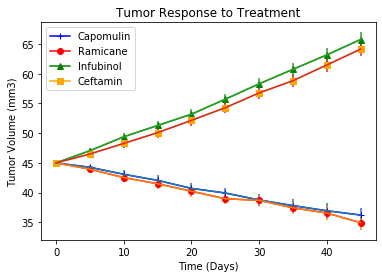

In [123]:
#plt.ylabel('Tumor Volume (mm3)')
#plt.xlabel('Tumor Response to Treatment')
x_axis_range = np.arange(0,50,5)

#for drug in drugs_to_analyze:
#    print (drug)
markers = ['+', 'o', '^', 's']
colors = ['blue', 'red', 'green', 'orange']
#for i in range(len(colors)):

#for num in range(len(colors)):
#    #print (colors[num])
#    plt.plot(x_axis_range, df_df_mtv_by_drug_time_formatted[drugs[num]], marker=markers[num], label=drugs[num], color=colors[num])








Capomulin, = plt.plot(x_axis_range, df_df_mtv_by_drug_time_formatted['Capomulin'], marker="+", label="Capomulin", color="blue")
Ramicane, = plt.plot(x_axis_range, df_df_mtv_by_drug_time_formatted['Ramicane'], marker="o", label="Ramicane", color="red")
Infubinol, = plt.plot(x_axis_range, df_df_mtv_by_drug_time_formatted['Infubinol'], marker="^", label="Infubinol", color="green")
Ceftamin, = plt.plot(x_axis_range, df_df_mtv_by_drug_time_formatted['Ceftamin'], marker="s", label="Ceftamin", color="orange")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.legend(handles=[Capomulin, Ramicane, Infubinol, Ceftamin], loc='best')
plt.errorbar(df_df_mtv_by_drug_time_formatted.index, df_df_mtv_by_drug_time_formatted["Capomulin"], yerr=df_sem_by_drug_time_formatted["Capomulin"])
plt.errorbar(df_df_mtv_by_drug_time_formatted.index, df_df_mtv_by_drug_time_formatted["Ramicane"], yerr=df_sem_by_drug_time_formatted["Capomulin"])
plt.errorbar(df_df_mtv_by_drug_time_formatted.index, df_df_mtv_by_drug_time_formatted["Infubinol"], yerr=df_sem_by_drug_time_formatted["Capomulin"])
plt.errorbar(df_df_mtv_by_drug_time_formatted.index, df_df_mtv_by_drug_time_formatted["Ceftamin"], yerr=df_sem_by_drug_time_formatted["Capomulin"])
plt.title('Tumor Response to Treatment')

In [124]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [125]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
df_metastic_site = pd.DataFrame()
df_metastic_site[['Drug','Timepoint', 'Metastatic Sites']] = df_clinical_data_all[['Drug','Timepoint', 'Metastatic Sites']]
df_mmsd_by_drug_time = df_metastic_site.groupby(['Drug','Timepoint']).mean()

# Preview DataFrame
df_mmsd_by_drug_time.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [126]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
df_sem_msd_by_drug_time = df_metastic_site.groupby(['Drug','Timepoint']).sem()

# Preview DataFrame
df_sem_msd_by_drug_time.head()
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [127]:
# Minor Data Munging to Re-Format the Data Frames
df_sem_msd_by_drug_time_pivot = pd.DataFrame()
# Preview that Reformatting worked
df_sem_msd_by_drug_time_pivot = df_sem_msd_by_drug_time.pivot_table(index='Timepoint', columns='Drug')['Metastatic Sites']
df_sem_msd_by_drug_time_pivot

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.074833  0.108588   0.091652  0.098100  0.093618  0.100947   
10          0.125433  0.152177   0.159364  0.142018  0.163577  0.115261   
15          0.132048  0.180625   0.194015  0.191381  0.158651  0.190221   
20          0.161621  0.241034   0.234801  0.236680  0.181731  0.234064   
25          0.181818  0.258831   0.265753  0.288275  0.185240  0.263888   
30          0.172944  0.249479   0.227823  0.347467  0.266667  0.300264   
35          0.169496  0.266526   0.224733  0.361418  0.330464  0.341412   
40          0.175610  0.289128   0.314466  0.315725  0.321702  0.297294   
45          0.202591  0.286101   0.309320  0.278722  0.351104  0.304240   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.095219  0.066332  0.087178   0.077709  
10         0.105690  0.090289  0.123672   0.109109  
15         0.136377  0.115261  0.153439   0.111677  
20         0.171499  0.119430  0.200905   0.166378  
25         0.199095  0.119430  0.219824   0.236621  
30         0.266469  0.139968  0.230641   0.248168  
35         0.366667  0.145997  0.240983   0.285714  
40         0.433903  0.160591  0.312815   0.299791  
45         0.428571  0.190221  0.359062   0.286400

Text(0.5, 1.0, 'Metastic Spread During Treatment')

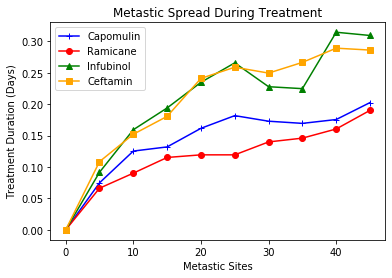

In [128]:
x_axis_range = np.arange(0,50,5)

#for drug in drugs_to_analyze:
#    print (drug)
markers = ['+', 'o', '^', 's']
colors = ['blue', 'red', 'green', 'orange']

Capomulin, = plt.plot(x_axis_range, df_sem_msd_by_drug_time_pivot['Capomulin'], marker="+", label="Capomulin", color="blue")
Ramicane, = plt.plot(x_axis_range, df_sem_msd_by_drug_time_pivot['Ramicane'], marker="o", label="Ramicane", color="red")
Infubinol, = plt.plot(x_axis_range, df_sem_msd_by_drug_time_pivot['Infubinol'], marker="^", label="Infubinol", color="green")
Ceftamin, = plt.plot(x_axis_range, df_sem_msd_by_drug_time_pivot['Ceftamin'], marker="s", label="Ceftamin", color="orange")
plt.ylabel('Treatment Duration (Days)')
plt.xlabel('Metastic Sites')
plt.legend(handles=[Capomulin, Ramicane, Infubinol, Ceftamin], loc='best')
#plt.errorbar(df_sem_msd_by_drug_time_pivot.index, df_sem_msd_by_drug_time_pivot["Capomulin"], yerr=df_sem_by_drug_time_formatted["Capomulin"])
#plt.errorbar(df_sem_msd_by_drug_time_pivot.index, df_sem_msd_by_drug_time_pivot["Ramicane"], yerr=df_sem_by_drug_time_formatted["Ramicane"])
#plt.errorbar(df_sem_msd_by_drug_time_pivot.index, df_sem_msd_by_drug_time_pivot["Infubinol"], yerr=df_sem_by_drug_time_formatted["Infubinol"])
#plt.errorbar(df_sem_msd_by_drug_time_pivot.index, df_sem_msd_by_drug_time_pivot["Ceftamin"], yerr=df_sem_by_drug_time_formatted["Ceftamin"])
plt.title('Metastic Spread During Treatment')

In [129]:
#plt.ylabel('Tumor Volume (mm3)')
#plt.xlabel('Tumor Response to Treatment')
#x_axis_range = np.arange(0,50,5)

#for drug in drugs_to_analyze:
#    plt.plot(x_axis_range, df_sem_msd_by_drug_time_pivot [drug].tolist())
#plt.ylabel('Tumor Volume (mm3)')
#plt.xlabel('Tumor Response to Treatment')

In [130]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [131]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_mouse_count = pd.DataFrame()

df_mouse_count[['Drug','Timepoint', 'Mouse Count']] = df_clinical_data_all[['Drug','Timepoint', 'Mouse ID']]
df_mouse_count_by_drug_time = df_mouse_count.groupby(['Drug','Timepoint']).count()

# Preview DataFrame

# Convert to DataFrame

# Preview DataFrame
#df_mouse_count.head()
df_mouse_count_by_drug_time.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [132]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [133]:
df_mouse_count_by_drug_time_pivot = pd.DataFrame()

df_mouse_count_by_drug_time_pivot = df_mouse_count_by_drug_time.pivot_table(index='Timepoint', columns='Drug')['Mouse Count']
df_mouse_count_by_drug_time_pivot

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   
25                22        18         18        19        18       17   
30                22        16         17        18        15       15   
35                22        14         12        17        15       14   
40                21        14         10        15        15       12   
45                21        13          9        11        13       11   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17  
25               14        23        19         16  
30               13        23        18         15  
35               10        21        16         14  
40                9        20        12         14  
45                7        20        11         14

In [134]:
#df_mouse_count_by_drug_time[drug].tolist()


Text(0.5, 1.0, 'Survival During Treatment')

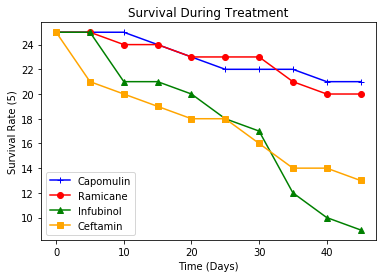

In [135]:
x_axis_range = np.arange(0,50,5)

#for drug in drugs_to_analyze:
#    print (drug)
markers = ['+', 'o', '^', 's']
colors = ['blue', 'red', 'green', 'orange']

Capomulin, = plt.plot(x_axis_range, df_mouse_count_by_drug_time_pivot['Capomulin'], marker="+", label="Capomulin", color="blue")
Ramicane, = plt.plot(x_axis_range, df_mouse_count_by_drug_time_pivot['Ramicane'], marker="o", label="Ramicane", color="red")
Infubinol, = plt.plot(x_axis_range, df_mouse_count_by_drug_time_pivot['Infubinol'], marker="^", label="Infubinol", color="green")
Ceftamin, = plt.plot(x_axis_range, df_mouse_count_by_drug_time_pivot['Ceftamin'], marker="s", label="Ceftamin", color="orange")
plt.ylabel('Survival Rate (5)')
plt.xlabel('Time (Days)')
plt.legend(handles=[Capomulin, Ramicane, Infubinol, Ceftamin], loc='best')
#plt.errorbar(df_sem_msd_by_drug_time_pivot.index, df_sem_msd_by_drug_time_pivot["Capomulin"], yerr=df_sem_by_drug_time_formatted["Capomulin"])
#plt.errorbar(df_sem_msd_by_drug_time_pivot.index, df_sem_msd_by_drug_time_pivot["Ramicane"], yerr=df_sem_by_drug_time_formatted["Ramicane"])
#plt.errorbar(df_sem_msd_by_drug_time_pivot.index, df_sem_msd_by_drug_time_pivot["Infubinol"], yerr=df_sem_by_drug_time_formatted["Infubinol"])
#plt.errorbar(df_sem_msd_by_drug_time_pivot.index, df_sem_msd_by_drug_time_pivot["Ceftamin"], yerr=df_sem_by_drug_time_formatted["Ceftamin"])
plt.title('Survival During Treatment')

In [136]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [137]:
# Calculate the percent changes for each drug
df_tumor_size_delta = pd.DataFrame(columns=drugs)
# Display the data to confirm
for drug in drugs:
    value = (df_df_mtv_by_drug_time_formatted[drug].loc[0] - df_df_mtv_by_drug_time_formatted[drug].loc[45]) / df_df_mtv_by_drug_time_formatted[drug].loc[0]
    df_tumor_size_delta[drug] = [value * -1]

In [138]:
df_tumor_size_delta

Capomulin  Ramicane  Infubinol  Ceftamin
0  -0.194753 -0.223209   0.461235  0.425165

In [139]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined